In [350]:

from sklearn.model_selection import train_test_split

def preprocess():
  data = pd.read_csv('dry_bean_dataset.csv')
  data['MinorAxisLength'].interpolate(method='linear', inplace=True)
  df = pd.DataFrame(data)
  return df

data = preprocess()
data = data[(data['Class'] == 'BOMBAY') | (data['Class'] == 'CALI')]


In [351]:
import numpy as np
def single_preceptron(learning_rate, epochs, Mse_threshold, features, classes, bias=False):
    X = data[features].values
    y = np.where(data['Class'] == classes[0], 1, -1)
    np.random.seed(0)
    weights = np.random.rand(X.shape[1])
    biass = np.random.rand() if bias else 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    # Perceptron learning
    for epoch in range(epochs):
        errors = 0
        for xi, target in zip(X_train, y_train):
            prediction = np.dot(xi, weights) + biass
            if target * prediction <= 0:
                weights += learning_rate * target * xi
                biass += learning_rate * target
                errors += 1
        if errors == 0:
            break

        mse = errors / len(X_train)
        if mse <= Mse_threshold:
            break
    
    # Calculate accuracy on the test set
    accuracy = np.sum(y_test == np.sign(np.dot(X_test, weights) + biass)) / len(y_test)
    
    return weights, biass

weights,bias_value = single_preceptron(0.1, 100, 0.01, ['MajorAxisLength','MinorAxisLength'], ['BOMBAY','CALI'], bias=False)


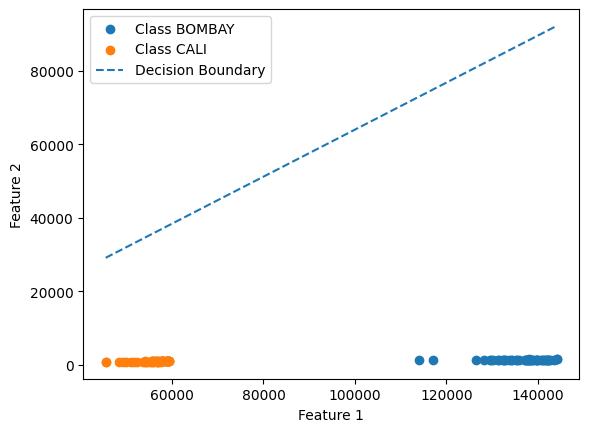

In [352]:
import matplotlib.pyplot as plt

# Assuming you have already defined X_test, y_test, weights, and bias_value

# Scatter plot for class 1
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label=f'Class BOMBAY')

# Scatter plot for class -1
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], label=f'Class CALI')

# Extract weights and bias
w0, w1 = weights
bias = bias_value

# Define the range for x values (feature 1)
x_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), num=100)

# Calculate the corresponding y values to plot the decision boundary line
y_range = (-bias - w0 * x_range) / w1

# Plot the decision boundary line
plt.plot(x_range, y_range, label='Decision Boundary', linestyle='--')

# Label the axes and add a legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()
